In [2]:
import yfinance as yf

In [3]:
sp500 = yf.Ticker('^GSPC')

In [4]:
sp500 = sp500.history(period='max')

/home/nikhilagarwal/.local/lib/python3.12/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [5]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [6]:
sp500.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24152 entries, 1927-12-30 00:00:00-05:00 to 2024-02-23 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24152 non-null  float64
 1   High          24152 non-null  float64
 2   Low           24152 non-null  float64
 3   Close         24152 non-null  float64
 4   Volume        24152 non-null  int64  
 5   Dividends     24152 non-null  float64
 6   Stock Splits  24152 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


In [7]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-02-09 00:00:00-05:00', '2024-02-12 00:00:00-05:00',
               '2024-02-13 00:00:00-05:00', '2024-02-14 00:00:00-05:00',
               '2024-02-15 00:00:00-05:00', '2024-02-16 00:00:00-05:00',
               '2024-02-20 00:00:00-05:00', '2024-02-21 00:00:00-05:00',
               '2024-02-22 00:00:00-05:00', '2024-02-23 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24152, freq=None)

<Axes: xlabel='Date'>

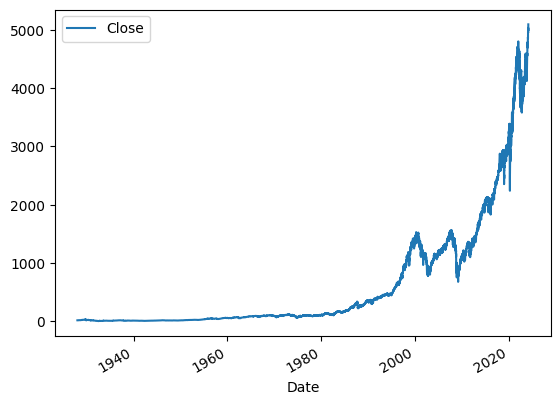

In [8]:
sp500.plot.line(y='Close',use_index = True)

In [9]:
del sp500['Dividends']
del sp500['Stock Splits']

In [10]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,4975.509766
2024-02-20 00:00:00-05:00,4989.319824,4993.709961,4955.020020,4975.509766,4034880000,4981.799805
2024-02-21 00:00:00-05:00,4963.029785,4983.209961,4946.000000,4981.799805,3788390000,5087.029785


In [12]:
sp500["Target"] = (sp500['Tomorrow']>sp500['Close']).astype(int)

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,4975.509766,0
2024-02-20 00:00:00-05:00,4989.319824,4993.709961,4955.020020,4975.509766,4034880000,4981.799805,1
2024-02-21 00:00:00-05:00,4963.029785,4983.209961,4946.000000,4981.799805,3788390000,5087.029785,1


In [14]:
sp500 = sp500.loc["1990-01-01":].copy()

In [15]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,4975.509766,0
2024-02-20 00:00:00-05:00,4989.319824,4993.709961,4955.020020,4975.509766,4034880000,4981.799805,1
2024-02-21 00:00:00-05:00,4963.029785,4983.209961,4946.000000,4981.799805,3788390000,5087.029785,1


In [16]:
sp500.isna().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
Tomorrow    1
Target      0
dtype: int64

In [17]:
sp500.describe()

,Open,High,Low,Close,Volume,Tomorrow,Target
count,8602.000000,8602.000000,8602.000000,8602.000000,8.602000e+03,8601.000000,8602.000000
mean,1597.747340,1607.169644,1587.721878,1598.106501,2.465562e+09,1598.250486,0.534992
std,1108.220734,1114.104442,1102.064833,1108.480074,1.848300e+09,1108.464070,0.498803
min,295.450012,301.450012,294.510010,295.459991,1.499000e+07,295.459991,0.000000
25%,897.735016,908.295013,885.020020,898.705002,6.469025e+08,898.719971,0.000000
50%,1270.155029,1277.900024,1261.859985,1270.259949,2.524140e+09,1270.319946,1.000000
75%,2059.679932,2070.320068,2045.745026,2059.800049,3.836900e+09,2059.820068,1.000000
max,5100.919922,5111.060059,5081.459961,5088.799805,1.145623e+10,5088.799805,1.000000


In [18]:
import seaborn as sns


<Axes: xlabel='Close', ylabel='Date'>

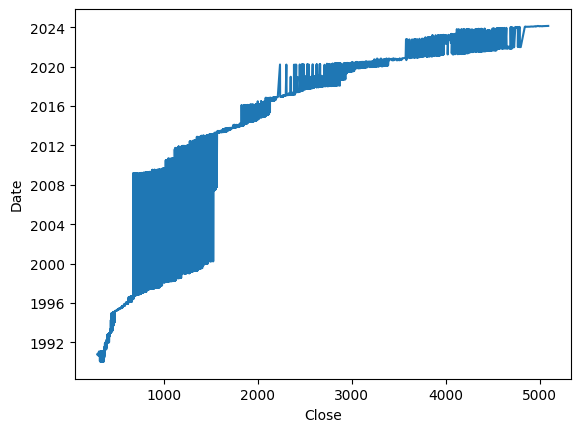

In [19]:
sns.lineplot(data=sp500,x='Close',y='Date')

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Close','Volume','Open','High','Low']
model.fit(train[predictors],train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [21]:
from sklearn.metrics import precision_score

In [22]:
preds = model.predict(test[predictors])

In [23]:
preds

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
import pandas as pd
preds = pd.Series(preds,index = test.index)

In [25]:
preds

Date
2023-10-02 00:00:00-04:00    1
2023-10-03 00:00:00-04:00    0
2023-10-04 00:00:00-04:00    1
2023-10-05 00:00:00-04:00    1
2023-10-06 00:00:00-04:00    1
                            ..
2024-02-16 00:00:00-05:00    0
2024-02-20 00:00:00-05:00    0
2024-02-21 00:00:00-05:00    0
2024-02-22 00:00:00-05:00    0
2024-02-23 00:00:00-05:00    0
Length: 100, dtype: int64

In [26]:
precision_score(test['Target'],preds)

0.5161290322580645

In [27]:
combined = pd.concat([test["Target"],preds],axis=1)

<Axes: xlabel='Date'>

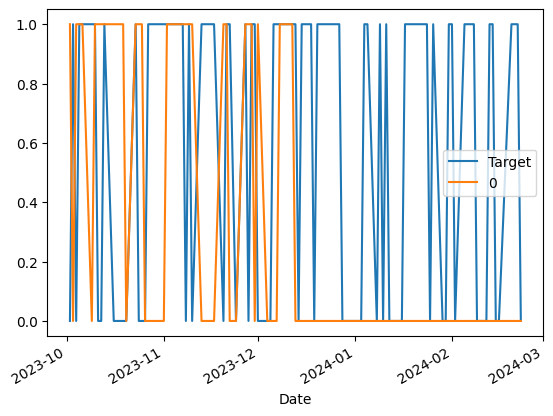

In [28]:
combined.plot()

In [29]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds,index = test.index,name = 'Predictions')
    combined = pd.concat([test['Target'],preds],axis=1)
    return combined

In [30]:
def backtest(data,model,predictors,start = 2500,step = 250):
    all_predictions = []

    for i in range(start,data.shape[0],step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [31]:
predictions = backtest(sp500,model,predictors)

In [32]:
predictions["Predictions"].value_counts()

Predictions
0    3506
1    2596
Name: count, dtype: int64

In [33]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5288906009244992

In [34]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500['Close']/rolling_averages['Close']

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']

    new_predictors += [ratio_column,trend_column]

In [35]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,4975.509766,0,0.997592,1.0,1.000676,2.0,1.049145,37.0,1.138856,139.0,1.244176,531.0
2024-02-20 00:00:00-05:00,4989.319824,4993.709961,4955.020020,4975.509766,4034880000,4981.799805,1,0.996988,0.0,0.996513,2.0,1.041254,37.0,1.131010,139.0,1.236084,531.0
2024-02-21 00:00:00-05:00,4963.029785,4983.209961,4946.000000,4981.799805,3788390000,5087.029785,1,1.000632,1.0,0.996630,3.0,1.041027,37.0,1.131421,140.0,1.237065,531.0


In [36]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns!='Tomorrow'])

In [37]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,4975.509766,0,0.997592,1.0,1.000676,2.0,1.049145,37.0,1.138856,139.0,1.244176,531.0
2024-02-20 00:00:00-05:00,4989.319824,4993.709961,4955.020020,4975.509766,4034880000,4981.799805,1,0.996988,0.0,0.996513,2.0,1.041254,37.0,1.131010,139.0,1.236084,531.0
2024-02-21 00:00:00-05:00,4963.029785,4983.209961,4946.000000,4981.799805,3788390000,5087.029785,1,1.000632,1.0,0.996630,3.0,1.041027,37.0,1.131421,140.0,1.237065,531.0


In [38]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7602 entries, 1993-12-14 00:00:00-05:00 to 2024-02-23 00:00:00-05:00
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              7602 non-null   float64
 1   High              7602 non-null   float64
 2   Low               7602 non-null   float64
 3   Close             7602 non-null   float64
 4   Volume            7602 non-null   int64  
 5   Tomorrow          7601 non-null   float64
 6   Target            7602 non-null   int64  
 7   Close_Ratio_2     7602 non-null   float64
 8   Trend_2           7602 non-null   float64
 9   Close_Ratio_5     7602 non-null   float64
 10  Trend_5           7602 non-null   float64
 11  Close_Ratio_60    7602 non-null   float64
 12  Trend_60          7602 non-null   float64
 13  Close_Ratio_250   7602 non-null   float64
 14  Trend_250         7602 non-null   float64
 15  Close_Ratio_1000  7602 non-null   float64

In [39]:
model = RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

In [40]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [41]:
predictions = backtest(sp500,model,new_predictors)

In [42]:
predictions["Predictions"].value_counts()

Predictions
0.0    4270
1.0     832
Name: count, dtype: int64

In [43]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5733173076923077

In [44]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.544688
0    0.455312
Name: count, dtype: float64

In [45]:
predictions.shape[0]

5102

In [46]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2024-02-16 00:00:00-05:00,0,0.0
2024-02-20 00:00:00-05:00,1,0.0
2024-02-21 00:00:00-05:00,1,0.0
